#### evaluate the prediction performance of the trained model

#### small model

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrix
 [[ 90  41]
 [ 57 104]]
accuracy:0.6643835616438356
precision:0.7172413793103448
recall:0.6459627329192547
f1-score:0.6797385620915033


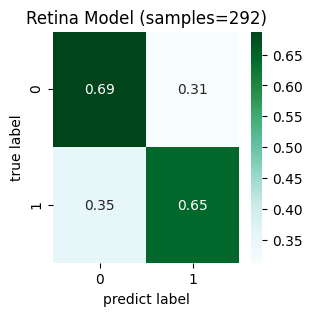

In [2]:
# load datasets
y_true = np.load('../../model/pred_results_skin/small_label.npy')
y_pred = np.load('../../model/pred_results_skin/small_predict.npy')

samples = y_true.shape[0]

y_score = y_pred.argmax(axis=1)       
test_label = y_true.argmax(axis=1)                         
y_score_pro = y_pred # (212, 2)
y_one_hot = y_true
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(test_label, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
print('precision:{}'.format(precision_score(test_label, y_score)))
print('recall:{}'.format(recall_score(test_label, y_score)))
print('f1-score:{}'.format(f1_score(test_label, y_score)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)
ax = plt.subplots(figsize=(3,3))
sns.heatmap(new_obj, fmt='.2f', cmap='BuGn', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.title('Retina Model (samples=' + str(samples) + ')')
plt.savefig('images/cm-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

AUC :  0.7150614561831488


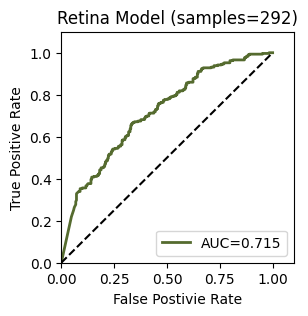

In [3]:
from sklearn.metrics import roc_curve, auc
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
fpr_xgb_1, tpr_xgb_1, thresholds_1 = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_xgb_1 = auc(fpr_xgb, tpr_xgb)
print("AUC : ", auc_xgb)
ax = plt.subplots(figsize=(3,3))
plt.title('Retina Model (samples=' + str(samples) + ')')
plt.plot(fpr_xgb, tpr_xgb, linewidth = 2,label='AUC=%.3f' % auc_xgb,color='#556B2F')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('images/auc-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

In [4]:
# load datasets
input = np.load("../../model/middle_output_skin/small_input.npy",allow_pickle=True) 
input2 = np.load("../../model/middle_output_skin/small_input2.npy",allow_pickle=True) 
input3 = np.load("../../model/middle_output_skin/small_input3.npy",allow_pickle=True) 
output = np.load("../../model/middle_output_skin/small_output.npy",allow_pickle=True) 
label = np.load("../../model/middle_output_skin/small_label.npy",allow_pickle=True) 
label = np.argmax(label, axis=-1) 
print(label.shape)

(2310,)


(2310, 16)


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(2310, 2)


<Figure size 640x480 with 0 Axes>

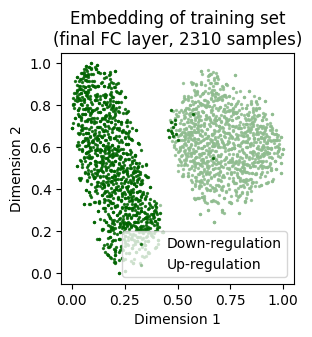

In [5]:
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

fig = plt.figure()
tsne = TSNE(n_components=2, init='pca', random_state=0)
print(output.shape)
result = tsne.fit_transform(output)
print(result.shape)
#fig = plot_embedding(result, label,'t-SNE embedding of the digits')
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)

color = ["#006400","#8FBC8F"]

ax = plt.subplots(figsize=(3,3))
for i in range(result.shape[0]):
    if(label[i] == 1):
        s2 = plt.scatter(result[i, 0], result[i, 1],s=2,color=color[label[i]],alpha=0.8)
for i in range(result.shape[0]):
    if(label[i] == 0):
        s1 = plt.scatter(result[i, 0], result[i, 1],s=2,color=color[label[i]],alpha=0.8)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Embedding of training set\n(final FC layer, 2310 samples)')
plt.legend((s1,s2),('Down-regulation','Up-regulation') ,loc = 'best')
plt.savefig('images/embedding-small.png',dpi=300, bbox_inches = 'tight')
plt.show()